## Import necessary libraries


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
import numpy as np

## Load the dataset


In [11]:
iris = pd.read_csv('iris.csv')

## Check the first few rows of the dataset


In [12]:
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


## Split the data into features (X) and target (y)


In [13]:
X = iris.drop(columns=['species'])  # Assuming 'species' is the target column
y = iris['species']

## Split the dataset into training and testing sets


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Convert the data into the format required by XGBoost (DMatrix)


In [15]:
# Label encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Use the encoded labels when creating DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train_encoded)
dtest = xgb.DMatrix(X_test, label=y_test_encoded)

In [26]:
df = pd.DataFrame({
    'Encoded Values': y_train_encoded,
    'Original Values': y_train
})
df

,Encoded Values,Original Values
81,1,versicolor
133,2,virginica
137,2,virginica
75,1,versicolor
109,2,virginica
...,...,...
71,1,versicolor
106,2,virginica
14,0,setosa
92,1,versicolor


## Set up the parameters for the XGBoost model


In [16]:
params = {
    'objective': 'multi:softmax',  # Multiclass classification
    'num_class': 3,  # Number of classes in the target variable (iris dataset has 3 classes)
    'max_depth': 3,  # Maximum depth of the trees
    'eta': 0.3,  # Learning rate
    'eval_metric': 'mlogloss'  # Evaluation metric: multi-class logarithmic loss
}

## Train the model


In [17]:
bst = xgb.train(params, dtrain, num_boost_round=100)

## Make predictions

In [18]:
y_pred = bst.predict(dtest)

## Evaluate the accuracy


In [19]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 0.00%


# Optional: Feature Importance Plot

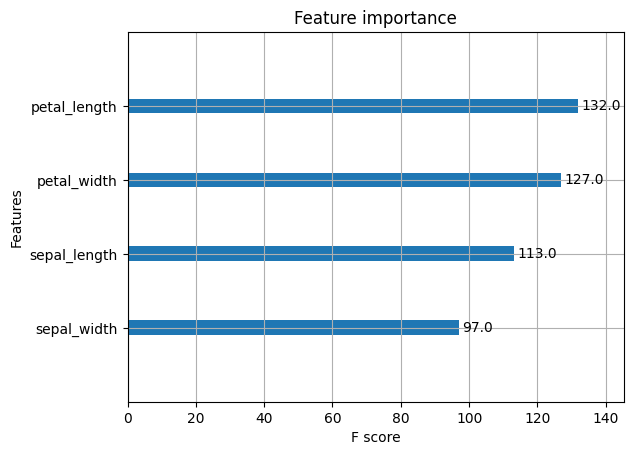

In [20]:
xgb.plot_importance(bst)
import matplotlib.pyplot as plt
plt.show()